1) (a) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

Text(0.5, 1.0, 'Sigmoid Function')

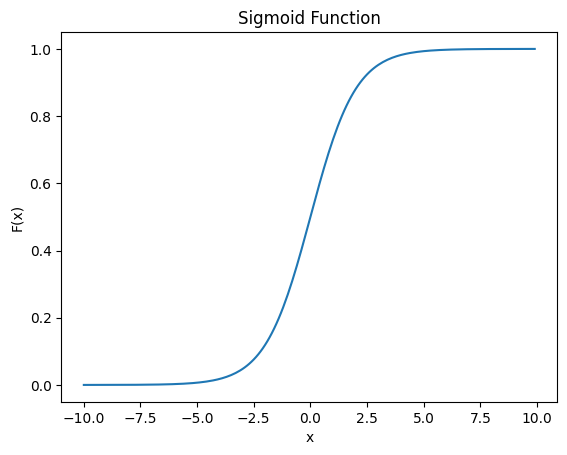

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def sigmoid(x):
    z= (1/(1+np.exp(-x)))
    return z
x=np.arange(-10,10,0.1)
F=sigmoid(x)
plt.plot(x,F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Sigmoid Function")

- This function is useful for a binary classification problem because it can map any input value to a value between 0 and 1. 
- if the value of x goes to positive infinity then the predicted value of y will become 1 and if it goes to negative infinity then the predicted value of y will become 0. And if the outcome of the sigmoid function is more than 0.5 then we classify that label as class 1 or positive class and if it is less than 0.5 then we can classify it to negative class or label as class 0.

b)Implement Logistic regression using the data provided (Logistic_regression_ls.csv) and plot the decision boundary (linear).

In [24]:

df=pd.read_csv("Logistic_regression_ls.csv")
df=df.fillna(0)
df2=(df-df.min())/(df.max()-df.min())
x1=df2['x1'].to_numpy()
x2=df2['x2'].to_numpy()
df2.drop(["label"],axis=1)
df2['label']=df['label']
X=df2.iloc[:,:-1].values
y=df2.iloc[:,-1:].values
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)


In [25]:
w=np.zeros([1,X.shape[1]])


In [26]:
#cost function
def Cost(X,y,w):
    tobesummed = -y*np.log(sigmoid(X@w.T))-(1-y)*np.log(1-sigmoid(X@w.T))
    return np.sum(tobesummed)/(len(X))
alpha=1
n=10000


In [27]:
#gradient descent
def gradientDescent(X,y,w,n,alpha):
    cost = np.zeros(n)
    for i in range(n):
        w = w - (alpha/len(X)) * (np.sum(X* (sigmoid(X @ w.T) - y),axis=0))
        cost[i] = Cost(X, y, w)
    
    return w,cost

In [28]:
weights,cost = gradientDescent(X,y,w,n,alpha)
print("The final weights are ",weights)
finalCost = Cost(X,y,weights)
print("The final cost value is ",finalCost)
print(*weights)


The final weights are  [[-17.07923686  18.45101925  17.88345671]]
The final cost value is  0.008352249636555082
[-17.07923686  18.45101925  17.88345671]


In [29]:

weights=np.array_split(*weights,3)


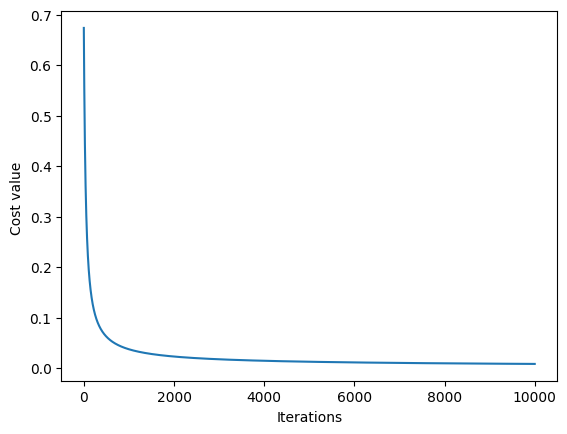

In [30]:
plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost value ")
plt.show()

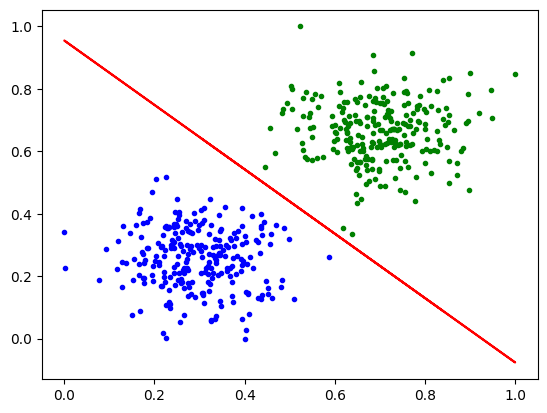

In [31]:
# Plotting Decision Boundary
decision_boundary=-(weights[0]+weights[1]*x1)/weights[2]
for i in range(len(y)):

    if y[i] == 0:
        plt.plot(X[i][1], X[i][2],'.',color='blue')
    
    else:
        plt.plot(X[i][1], X[i][2],'.',color='green')
plt.plot(x1,decision_boundary,c='red')

plt.show()